Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 221s 245ms/step - accuracy: 0.2487 - loss: 1.8163 - val_accuracy: 0.3491 - val_loss: 1.6203
Epoch 2/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.3438 - loss: 1.6460 - val_accuracy: 0.4645 - val_loss: 1.4105
Epoch 3/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.4251 - loss: 1.4954 - val_accuracy: 0.4915 - val_loss: 1.3340
Epoch 4/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 214s 238ms/step - accuracy: 0.4556 - loss: 1.4145 - val_accuracy: 0.5081 - val_loss: 1.2912
Epoch 5/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 181s 202ms/step - accuracy: 0.4751 - loss: 1.3739 - val_accuracy: 0.5251 - val_loss: 1.2573
Epoch 6/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 37s 42ms/step - accuracy: 0.4916 - loss: 1.3481 - val_accuracy: 0.5251 - val_loss: 1.2462
Epoch 7/25
898/898 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.4993 - loss: 1.3224 - val_accuracy: 0.5414 - val_loss: 1.2101

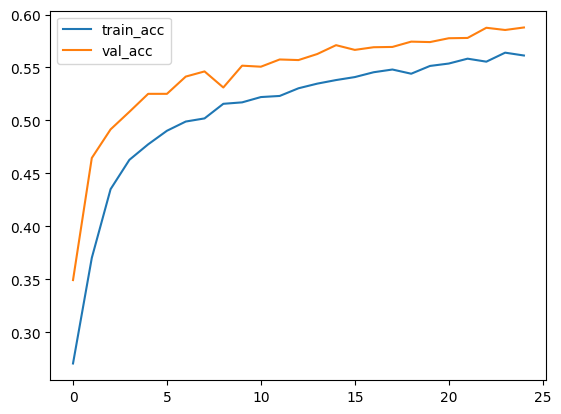

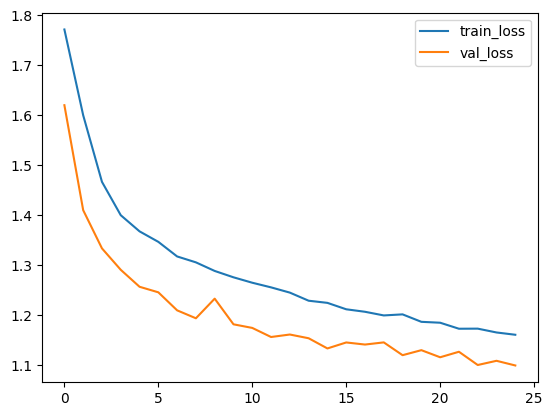

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Paths
train_dir = 'EmotionData/train'
test_dir = 'EmotionData/test'

# Image data generator with normalization & augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical'
)

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 6 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator
)

# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [4]:
model.save('emotion_detection_model.keras')
